In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import gradio as gr
from io import open
import os
pd.options.display.max_columns = 150

/media/henrique/SSD(SATA)/Big-Five-Personality-Test/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(os.path.join('..', 'IPIP-FFM-data-8Nov2018', 'data-final.csv'), sep='\t')

In [3]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
drop_columns = df.columns[50:110]
df = df.drop(drop_columns, axis=1)

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,"1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00","1,013,558.00"
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [6]:
zero_count = (df == 0).sum()

print("QTD:")
print(zero_count)

QTD:
EXT1      3720
EXT2      6099
EXT3      6075
EXT4      6893
EXT5      9781
EXT6      6183
EXT7      8179
EXT8      6372
EXT9      6845
EXT10     6261
EST1      7799
EST2      9579
EST3      5508
EST4     10656
EST5      6101
EST6     10847
EST7      6300
EST8      7388
EST9      6370
EST10     7155
AGR1      4957
AGR2      9281
AGR3      5016
AGR4      7636
AGR5      6523
AGR6     10359
AGR7      6299
AGR8      8526
AGR9      6058
AGR10     8403
CSN1     12197
CSN2      6436
CSN3      6059
CSN4      6823
CSN5      7834
CSN6      6652
CSN7      7294
CSN8      8141
CSN9      7503
CSN10     8697
OPN1      9201
OPN2      5942
OPN3      7588
OPN4      6661
OPN5      7682
OPN6      8128
OPN7      8468
OPN8      8026
OPN9      7692
OPN10     6177
dtype: int64


In [7]:
df = df[(df > 0).all(axis=1)]
zero_count = (df == 0).sum()
print("QTD:")

QTD:


In [8]:
kmeans = KMeans
visualizer = KElbowVisualizer(kmeans(), k=(2,10))

In [9]:
df_sample = df.sample(n = 5000, random_state=1)

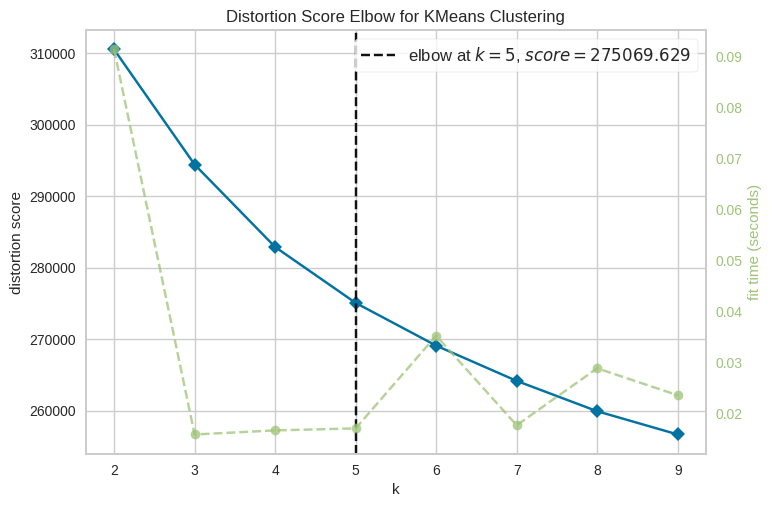

In [10]:
visualizer.fit(df_sample)
visualizer.poof();

In [11]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

In [12]:
predic = k_fit.labels_
df['Cluster'] = predic

In [13]:
print(df.shape)
df.head()

(874434, 51)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


In [14]:
df["Cluster"].value_counts()

Cluster
0    192805
1    183282
2    180338
4    169170
3    148839
Name: count, dtype: int64

In [15]:
df.groupby("Cluster").mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.46,1.91,3.81,2.49,4.06,1.82,3.67,2.76,3.79,2.99,3.81,2.96,4.24,2.42,3.27,3.47,3.80,3.45,3.64,3.18,2.14,4.30,2.66,4.19,2.00,4.01,1.85,3.91,4.13,3.86,2.98,3.64,3.85,3.25,2.21,3.54,3.46,2.84,2.93,3.49,3.79,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.22
1,3.46,1.96,4.33,2.24,4.27,1.68,3.87,2.82,3.74,2.53,2.32,3.85,3.15,3.32,2.11,1.90,2.10,1.67,2.11,1.72,1.89,4.45,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.58,4.20,1.90,3.14,2.27,3.88,1.94,3.59,3.89,3.91,1.75,4.09,1.79,4.16,1.66,4.33,3.25,4.11,4.29
2,2.14,3.27,3.11,3.64,3.00,2.69,2.24,3.99,2.33,4.12,3.60,3.03,4.21,2.59,2.88,2.88,2.94,2.50,3.04,2.76,1.85,3.98,1.69,4.39,1.96,4.20,1.99,4.01,4.20,3.73,3.86,2.21,4.30,2.03,3.26,2.06,4.19,2.02,3.86,3.90,3.56,2.17,3.89,2.08,3.71,1.99,4.00,2.97,4.27,3.79
3,2.15,3.45,2.81,3.59,2.62,2.87,2.12,3.72,2.69,3.99,2.42,3.74,3.12,3.01,2.38,2.08,2.37,1.98,2.67,2.36,3.05,3.02,2.63,2.91,3.24,2.79,3.10,2.98,2.73,3.09,3.29,2.91,3.84,2.46,2.44,2.81,3.56,2.57,2.90,3.52,3.73,1.95,3.79,2.05,3.79,2.05,4.09,3.30,3.92,3.84
4,1.81,3.64,2.23,4.06,2.29,3.19,1.74,4.08,2.18,4.49,4.28,2.46,4.52,2.13,3.57,3.89,4.00,3.78,4.01,3.96,2.47,3.37,2.60,3.83,2.57,3.86,2.72,3.43,3.66,3.05,2.81,3.39,3.81,3.51,2.07,3.52,3.56,3.07,2.76,3.31,3.52,2.38,4.07,2.13,3.43,2.09,3.69,3.19,4.29,3.72


In [16]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
arg = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [17]:
df_sum = pd.DataFrame()
df_sum['extroversion'] = df[ext].sum(axis=1)/10
df_sum['neurotic'] = df[est].sum(axis=1)/10
df_sum['agreeable'] = df[arg].sum(axis=1)/10
df_sum['conscientious'] = df[csn].sum(axis=1)/10
df_sum['open'] = df[opn].sum(axis=1)/10
df_sum['Cluster'] = predic

In [18]:
df_sum.head()

,extroversion,neurotic,agreeable,conscientious,open,Cluster
0,3.00,2.40,3.10,3.20,3.30,1
1,3.40,2.10,3.20,3.10,2.70,2
2,2.90,2.60,2.80,2.80,3.10,2
3,2.60,2.70,3.20,2.70,3.10,3
4,3.50,2.30,3.00,3.20,3.60,1


In [19]:
df_cluster = df_sum.groupby("Cluster").mean()

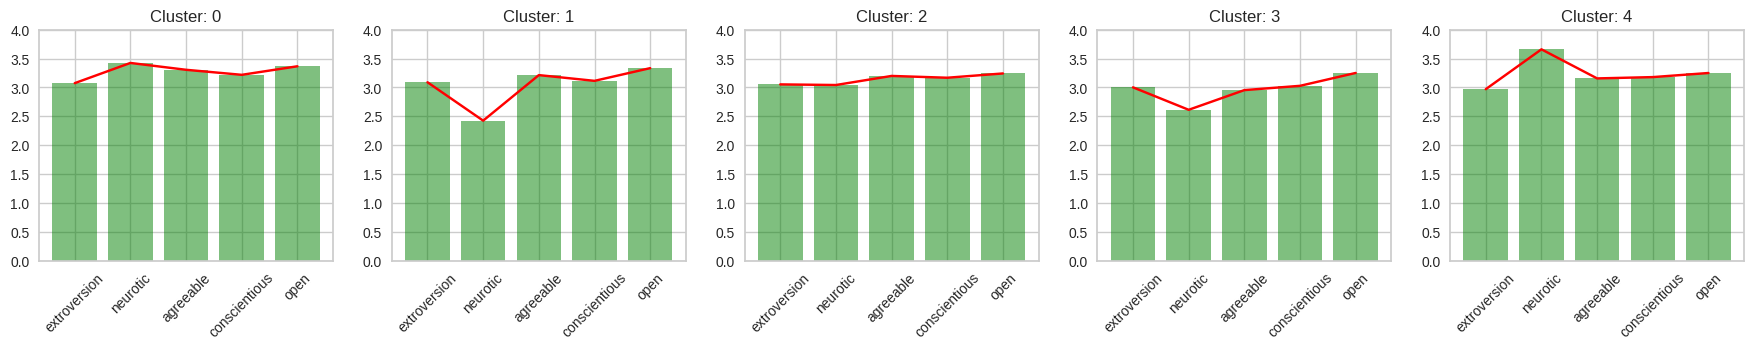

In [20]:
plt.figure(figsize=(22,3))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.bar(df_cluster.columns, df_cluster.iloc[i], color='green',alpha=0.5)
    plt.plot(df_cluster.columns, df_cluster.iloc[i],color='red')
    plt.title('Cluster: ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [21]:
df[:0].to_excel("questions.xlsx", index=False)

In [22]:
my_data = pd.read_csv("perguntas lu(Sheet1).csv")
my_data = my_data.drop(columns=['Cluster'])

In [ ]:
personality_group = k_fit.predict(my_data)[0]
print("Personality Group: ", personality_group)


Personality Group:  2


In [ ]:
df_cluster = df_sum.groupby("Cluster").mean()

for cluster in range(df_cluster.shape[0]): 
    print(f"Cluster {cluster}:")
    ranked_traits = df_cluster.iloc[cluster].sort_values(ascending=False)
    for rank, (trait, value) in enumerate(ranked_traits.items(), start=1):
        print(f"{rank}. {trait}")
    print()

Cluster 0:
1. neurotic
2. open
3. agreeable
4. conscientious
5. extroversion

Cluster 1:
1. open
2. agreeable
3. conscientious
4. extroversion
5. neurotic

Cluster 2:
1. open
2. agreeable
3. conscientious
4. extroversion
5. neurotic

Cluster 3:
1. open
2. conscientious
3. extroversion
4. agreeable
5. neurotic

Cluster 4:
1. neurotic
2. open
3. conscientious
4. agreeable
5. extroversion



In [ ]:
dict_questions = open("questions.txt").read().split("\n")

In [ ]:
dict_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


In [ ]:
questions = []
for q in dict_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

In [28]:
inputs_questions = []
for q in questions:
    obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
    inputs_questions.append(obj_input)


In [29]:
inputs_questions

In [30]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

iface = gr.Interface(
                    fn=predict,
                    title="Big Five Personality",
                    description="System for detecting personality traits.",
                    inputs=inputs_questions,
                    outputs="text")
iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://7597e2e86fa45c6085.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
